In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from seaborn import countplot


In [3]:
Salary=pd.read_csv("C:/Users/Charumathi/Desktop/Salary_Data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
Salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
X=Salary.iloc[:, :-1].values
Y=Salary.iloc[:,1].values

In [10]:
#Spliting the data into Training and Testing set
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [13]:
print(regressor.intercept_)

26780.099150628186


In [14]:
print(regressor.coef_)

[9312.57512673]


In [15]:
Y_pred=regressor.predict(X_test)
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [16]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


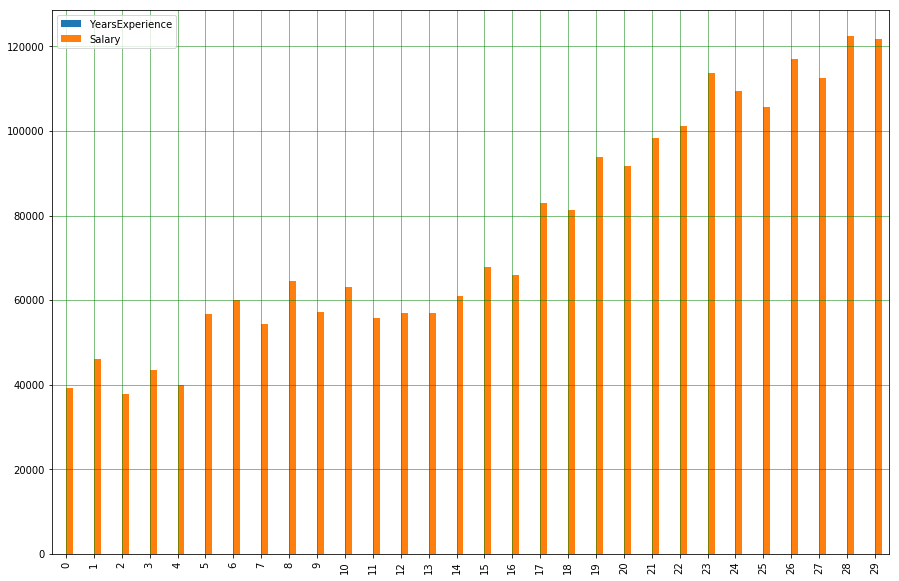

In [19]:
Salary.plot(kind='bar',figsize=(15,10))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5', color='black')

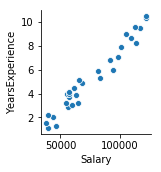

In [33]:
sns.pairplot(Salary ,x_vars ='Salary', y_vars ="YearsExperience",kind='scatter')
#plt.title("TV vs Sales")
#plt.xlabel("Tv")
#plt.ylabel("Sales")
plt.show()


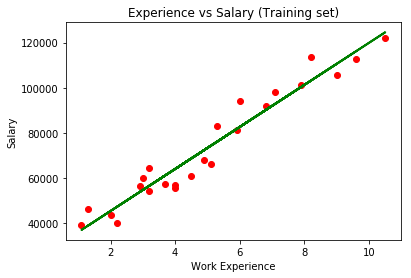

In [34]:
plt.title("Experience vs Salary (Training set)")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='green', linewidth=2)
plt.show()

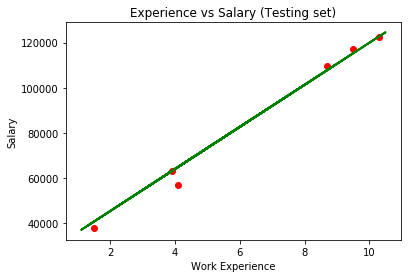

In [23]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='green', linewidth=2)
#Student_score.plot(x='Hours',y="Scores",style='o')
plt.title("Experience vs Salary (Testing set)")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.show()

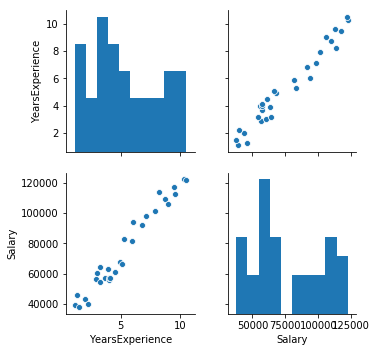

In [24]:
Score=Salary.head()
Score
#sns.set_style("whitegrid")
#sns.boxplot(x='Hours',y='Scores',data=Score)
sns.pairplot(Salary)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

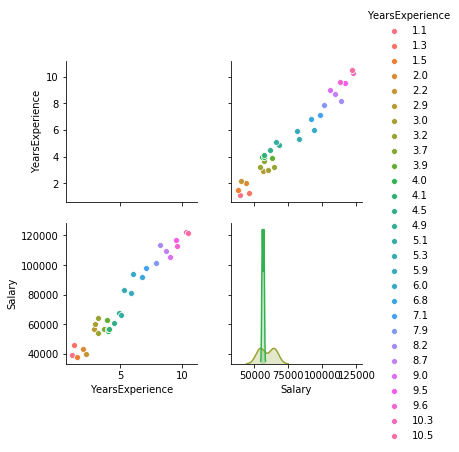

In [26]:
sns.pairplot(Salary,hue='YearsExperience')
plt.show()

Text(0.5,1,'Countplot for salary')

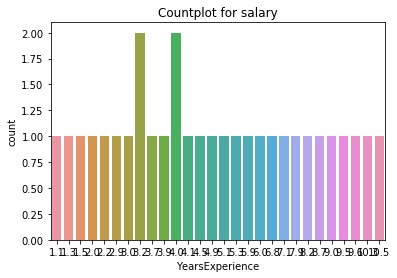

In [29]:
sns.countplot(x = 'YearsExperience', data= Salary).set_title('Countplot for salary')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F5A647AC8>,
      dtype=object)

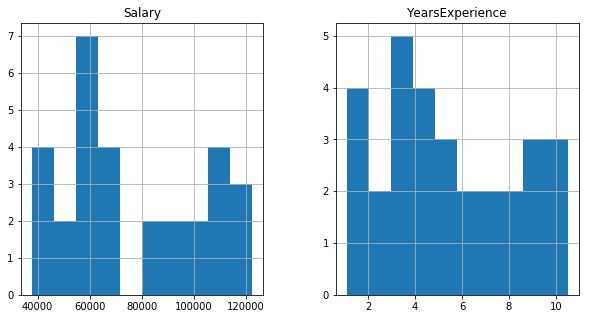

In [31]:
Salary.hist(bins=10,figsize=(10,5))

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345
